In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.ticker as mticker 
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import mlab
import scipy.interpolate as spi
from scipy import stats

# Read the monthly O3 

### Ozone forcing HIST

In [2]:
%cd /sfs/fs1/work-geomar/smomw418/models/foci/experiments
hist_o3 = xr.open_dataset('FOCI1.14-SW079_echam6_echam_1850-2099_ao3_pl.nc', decode_times=True)
hist_o3 = hist_o3.sel(time=slice('1958-01-01', '2013-12-31'), plev=7000)

/sfs/fs1/work-geomar/smomw418/models/foci/experiments


### FOCI-MOZ

In [3]:
%cd sw054
sw054_o3 = xr.open_dataset('FOCI1.4-SW054_echam6_alltrm_1954-2013_O3_pl.nc', decode_times=True)
sw054_o3 = sw054_o3.sel(time=slice('1958-01-01', '2013-12-31'), plev=7000)
%cd sw064
sw064_o3 = xr.open_dataset('FOCI1.4-SW064_echam6_alltrm_1952-2013_O3_pl.nc', decode_times=True)
sw064_o3 = sw064_o3.sel(time=slice('1958-01-01', '2013-12-31'), plev=7000)
%cd sw065
sw065_o3 = xr.open_dataset('FOCI1.4-SW065_echam6_alltrm_1950-2013_O3_pl.nc', decode_times=True)
sw065_o3 = sw065_o3.sel(time=slice('1958-01-01', '2013-12-31'), lev=7000)

(bookmark:sw054) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


In [4]:
# Make sure all have the same lat
sw064_o3 = sw064_o3.assign_coords(lat=sw054_o3.lat)
sw065_o3 = sw065_o3.assign_coords(lat=sw054_o3.lat)
hist_o3 = hist_o3.assign_coords(lat=sw054_o3.lat)

## Read the monthly Temperature and geopotential height

### FOCI-HIST

In [5]:
%cd -b sw060
sw060 = xr.open_dataset('FOCI1.7-SW060_echam6_ATM_mm_1958-2013.nc', decode_times=True)
sw060 = sw060.sel(plev=7000)
%cd -b sw061
sw061 = xr.open_dataset('FOCI1.7-SW061_echam6_ATM_mm_1958-2013.nc', decode_times=True)
sw061 = sw061.sel(plev=7000)
%cd -b jh019
jh019 = xr.open_dataset('FOCI1.9.4-JH019_echam6_ATM_mm_1958-2013.nc', decode_times=True)
jh019 = jh019.sel(plev=7000)

(bookmark:sw060) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
(bookmark:sw061) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
(bookmark:jh019) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6


### FOCI-MOZ

In [6]:
%cd -b sw054
sw054 = xr.open_dataset('FOCI1.4-SW054_echam6_ATM_mm_full.nc', decode_times=True)
sw054 = sw054.sel(plev=7000)
%cd -b sw064
sw064 = xr.open_dataset('FOCI1.4-SW064_echam6_ATM_mm_full.nc', decode_times=True)
sw064 = sw064.sel(plev=7000)
%cd -b sw065
sw065 = xr.open_dataset('FOCI1.4-SW065_echam6_ATM_mm_full.nc', decode_times=True)
sw065 = sw065.sel(plev=7000)

(bookmark:sw054) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/sfs/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


In [7]:
sw065

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 192, time: 672)
Coordinates:
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 354.375 356.25 358.125
  * lat        (lat) float32 88.57217 86.722534 ... -86.722534 -88.57217
    plev       float64 7e+03
  * time       (time) datetime64[ns] 1958-01-31T23:52:00 ... 2013-12-31T23:52:00
Data variables:
    t          (time, lat, lon) float32 ...
    u          (time, lat, lon) float32 ...
    v          (time, lat, lon) float32 ...
    q          (time, lat, lon) float32 ...
    omega      (time, lat, lon) float32 ...
    xl         (time, lat, lon) float32 ...
    xi         (time, lat, lon) float32 ...
    geopoth    (time, lat, lon) float32 ...
    rhumidity  (time, lat, lon) float32 ...
    aclcac     (time, lat, lon) float32 ...
    svo        (time, lat, lon) float32 ...
    stream     (time, lat, lon) float32 ...
    velopot    (time, lat, lon) float32 ...
    sd         (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Jun 25 17:34:03 2018: cdo -t echam6 -r -f nc4c copy /gf...
    source:       ECHAM6
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

## Define function to compute volume mixing ratio (ppmv) and number density 

In [8]:
def vmr(ozone):
    # Input: ozone -> O3 mass mixing ratio in kg/kg

    # Convert from kg/kg to microg/g (multiply by 10^6)
    m = ozone*1e6
    # Convert the mass mixing ratio to volume mixing ratio in ppmv
    vmr = m*(28.9644/47.9982) # approx 0.603
    
    return vmr

## Compute volume mixing ratio (in ppmv)

In [9]:
sw054_o3

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 192, time: 672)
Coordinates:
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * lat      (lat) float32 88.57217 86.722534 84.86197 ... -86.722534 -88.57217
    plev     float64 7e+03
  * time     (time) datetime64[ns] 1958-01-31T23:52:00 ... 2013-12-31T23:52:00
Data variables:
    O3       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.0 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Wed Mar 07 08:43:05 2018: cdo -t /gfs2/work/shkifmsw/models...
    CDO:          Climate Data Operators version 1.9.0 (http://mpimet.mpg.de/...

In [10]:
sw054_vmr = vmr(sw054_o3.O3)
sw064_vmr = vmr(sw064_o3.O3)
sw065_vmr = vmr(sw065_o3.O3)

hist_vmr = vmr(hist_o3.ao3)

## Compute anomalies from zonal means

In [11]:
# Ozone
sw054_za70 = sw054_vmr - sw054_vmr.mean(dim='lon')
sw064_za70 = sw064_vmr - sw064_vmr.mean(dim='lon')
sw065_za70 = sw065_vmr - sw065_vmr.mean(dim='lon')
hist_za70 = hist_vmr - hist_vmr.mean(dim='lon')

In [12]:
# Temperature 
sw054_za70_t = sw054.t - sw054.t.mean(dim='lon')
sw064_za70_t = sw064.t - sw064.t.mean(dim='lon')
sw065_za70_t = sw065.t - sw065.t.mean(dim='lon')

sw060_za70_t = sw060.t - sw060.t.mean(dim='lon')
sw061_za70_t = sw061.t - sw061.t.mean(dim='lon')
jh019_za70_t = jh019.t - jh019.t.mean(dim='lon')

In [13]:
# Geopotential height
sw054_za70_g = sw054.geopoth- sw054.geopoth.mean(dim='lon')
sw064_za70_g = sw064.geopoth - sw064.geopoth.mean(dim='lon')
sw065_za70_g = sw065.geopoth - sw065.geopoth.mean(dim='lon')

sw060_za70_g = sw060.geopoth - sw060.geopoth.mean(dim='lon')
sw061_za70_g = sw061.geopoth - sw061.geopoth.mean(dim='lon')
jh019_za70_g = jh019.geopoth - jh019.geopoth.mean(dim='lon')

## Select months

In [14]:
def ii_sel_months(data):
    #----------------------------------------select each calendar month and average over it for each year----------------------------------
    # Input: data = xarray containing the data
    # Output: an array with yearly timeseries for each month
    # Author: Ioana Ivanciu (27.10.2018)
    #------------------------------------------------------------------------------------------------------------------------------
    
    import xarray as xr
    
    # Define boolean masks for each month
    def is_jan(month):
        return month==1 # returns an array with true where the month is in Jan and false elswhere
    def is_feb(month):
        return month==2
    def is_mar(month):
        return month==3
    def is_apr(month):
        return month==4
    def is_may(month):
        return month==5
    def is_jun(month):
        return month==6
    def is_jul(month):
        return month==7
    def is_aug(month):
        return month==8
    def is_sep(month):
        return month==9
    def is_oct(month):
        return month==10
    def is_nov(month):
        return month==11
    def is_dec(month):
        return month==12
    
    
    # Select each mon and average it over each year
    data_jan = data.sel(time=is_jan(data['time.month'])).groupby('time.year').mean(dim='time')
    data_feb = data.sel(time=is_feb(data['time.month'])).groupby('time.year').mean(dim='time')
    data_mar = data.sel(time=is_mar(data['time.month'])).groupby('time.year').mean(dim='time')
    data_apr = data.sel(time=is_apr(data['time.month'])).groupby('time.year').mean(dim='time')
    data_may = data.sel(time=is_may(data['time.month'])).groupby('time.year').mean(dim='time')
    data_jun = data.sel(time=is_jun(data['time.month'])).groupby('time.year').mean(dim='time')
    data_jul = data.sel(time=is_jul(data['time.month'])).groupby('time.year').mean(dim='time')
    data_aug = data.sel(time=is_aug(data['time.month'])).groupby('time.year').mean(dim='time')
    data_sep = data.sel(time=is_sep(data['time.month'])).groupby('time.year').mean(dim='time')
    data_oct = data.sel(time=is_oct(data['time.month'])).groupby('time.year').mean(dim='time')
    data_nov = data.sel(time=is_nov(data['time.month'])).groupby('time.year').mean(dim='time')
    data_dec = data.sel(time=is_dec(data['time.month'])).groupby('time.year').mean(dim='time')
    
    data_mon = xr.concat([data_jan, data_feb, data_mar, data_apr, data_may, data_jun, data_jul, data_aug, data_sep, data_oct, data_nov, data_dec], 'month')
    
    return data_mon

In [15]:
def ii_ens31_mon_diff_zonal_anom(data1, data2, data3, ens1):
    #---------------------------------------Difference of means and its significance------------------------------------
    
    # Compute anomalies from zonal mean
    
    data1_za = data1 - data1.mean(dim='lon')
    data2_za = data2 - data2.mean(dim='lon')
    data3_za = data3 - data3.mean(dim='lon')
    ens1_za = ens1 - ens1.mean(dim='lon')
    
    # Select months
    dmon1 = ii_sel_months(data1_za)
    dmon2 = ii_sel_months(data3_za)
    dmon3 = ii_sel_months(data3_za)
    emon1 = ii_sel_months(ens1_za)
     
    # Compute the ensemble mean 
    ens_mean1 = xr.concat((dmon1, dmon2, dmon3), dim='exp').mean(dim='exp')
    ens_mean2 = emon1

    # Compute the variance over the stacked ensemble members for each season
    stack1 = xr.concat((dmon1, dmon2, dmon3), dim='year') # stack the ensemble members over dimension time
    
    var1 = ((stack1 - stack1.mean(dim='year'))**2).sum(dim='year') # compute the variance
    var2 = ((emon1 - emon1.mean(dim='year'))**2).sum(dim='year') # compute the variance    
   
    # Define function for t-test (95%) 
    
    def ii_t_test(data1, data2, var1, var2):
        #------------------ t-test for the significance of the difference of means-----------------------------------
        # Following Zwiers and von Storch (1995) and von Storhc and Zwiers Statistical Analysis in Climate Reasearch book.
        # The test is appropriete when the sum of the effective sample sizes of the two samples is grater than 30 (assuming equal varience).
        # Assumptions: 
        #     - the process from which "observations" are sampled is a Gaussian red noise process (AR(1))
        #     - both samples for which the difference of mean is tested come from red noise processes with equal variance and equal lag-1 autocorrelation
        # Input : data1, data2 -> the two 3D arrays for which the difference in means and its significance is calculated
        # Output: mean1., mean2 -> 2D arrays of time means corresponfing to data1, and data2, respectively
        #         diff -> the difference of means (2D array)
        #         signif -> 2D array with 1 where diff is significant at the 95% level and 0 elsewhere
        #         t -> the test statistic (difference divioded by its standard error); (2D array)
        #         cv -> the critical value for the respective DOF and signif level (95%, two-sided test); (2D array)
        #         df -> the correspondig degress of freedom, given by the sum of the effective sample sizes -2; (2D array)
        # Author: Ioana Ivanciu on 28.03.2019

        import scipy.stats as st
        
        # Compute the pooled sample variance (Zwiers and von Storch 1995 eq. 13/ von Storch and Zwiers eq. 6.17)
        mean1 = data1.mean(dim='year')
        mean2 = data2.mean(dim='year')
        var = (var1 + var2) / ( len(data1.year)*3+len(data2.year)-2 )
    
        # Degrees of freedom for the t-test
        df = len(data1.year)*3+len(data2.year)-2  # von Storch and Zwiers book section 6 pg. 121
    
        # Compute the test statistic (von Storch and Zwiers book section 6 pg. 121 eq. 6.23; this differes from 
        # Zwiers and von Storch 1995 eq. 12 as the square root is placed elsewhere 
        diff = mean1 - mean2
        t = diff / ( np.sqrt(var) * np.sqrt(1/(len(data1.year)*3) + 1/len(data2.year) ))
    
        # Compute the critical value for a two-sided t-test with df
        # Use scipy.stats.t.pff -> gives the point at which a given percentile occurs for the t-distribution with df
        cv = st.t.ppf(0.975,df) # 0.975 because we want a two-sided test
    
        # Construct array with 1 where the difference is significant and 0 elsewhere
        signif = np.zeros(t.shape)
        signif[(xr.ufuncs.fabs(t)>cv).values] = 1 # take absolute value of t to include negative values
    
        return mean1, mean2, diff, signif, t, cv, df
    
    # Compute means, the difference between means and the significance
    mean1, mean2, diff, _, t, cv, _ = ii_t_test(ens_mean1, ens_mean2, var1, var2)
    
    sign = xr.where(xr.ufuncs.fabs(t)>cv, diff, np.nan)
    
    return mean1, mean2, diff, sign

In [16]:
def ii_ens3_mon_diff_zonal_anom(data1, data2, data3, ens1, ens2, ens3):
    #---------------------------------------Difference of means and its significance------------------------------------
    
    # Compute anomalies from zonal mean
    
    data1_za = data1 - data1.mean(dim='lon')
    data2_za = data2 - data2.mean(dim='lon')
    data3_za = data3 - data3.mean(dim='lon')
    ens1_za = ens1 - ens1.mean(dim='lon')
    ens2_za = ens2 - ens2.mean(dim='lon')
    ens3_za = ens3 - ens3.mean(dim='lon')
    
    # Select months
    dmon1 = ii_sel_months(data1_za)
    dmon2 = ii_sel_months(data3_za)
    dmon3 = ii_sel_months(data3_za)
    emon1 = ii_sel_months(ens1_za)
    emon2 = ii_sel_months(ens2_za)
    emon3 = ii_sel_months(ens3_za)
     
    # Compute the ensemble mean 
    ens_mean1 = xr.concat((dmon1, dmon2, dmon3), dim='exp').mean(dim='exp')
    ens_mean2 = xr.concat((emon1, emon2, emon3), dim='exp').mean(dim='exp')

    # Compute the variance over the stacked ensemble members for each season
    stack1 = xr.concat((dmon1, dmon2, dmon3), dim='year') # stack the ensemble members over dimension time
    stack2 = xr.concat((emon1, emon2, emon3), dim='year') # stack the ensemble members over dimension time
    
    var1 = ((stack1 - stack1.mean(dim='year'))**2).sum(dim='year') # compute the variance
    var2 = ((stack2 - stack2.mean(dim='year'))**2).sum(dim='year') # compute the variance  
   
    # Define function for t-test (95%) 
    
    def ii_t_test(data1, data2, var1, var2):
        #------------------ t-test for the significance of the difference of means-----------------------------------
        # Following Zwiers and von Storch (1995) and von Storhc and Zwiers Statistical Analysis in Climate Reasearch book.
        # The test is appropriete when the sum of the effective sample sizes of the two samples is grater than 30 (assuming equal varience).
        # Assumptions: 
        #     - the process from which "observations" are sampled is a Gaussian red noise process (AR(1))
        #     - both samples for which the difference of mean is tested come from red noise processes with equal variance and equal lag-1 autocorrelation
        # Input : data1, data2 -> the two 3D arrays for which the difference in means and its significance is calculated
        # Output: mean1., mean2 -> 2D arrays of time means corresponfing to data1, and data2, respectively
        #         diff -> the difference of means (2D array)
        #         signif -> 2D array with 1 where diff is significant at the 95% level and 0 elsewhere
        #         t -> the test statistic (difference divioded by its standard error); (2D array)
        #         cv -> the critical value for the respective DOF and signif level (95%, two-sided test); (2D array)
        #         df -> the correspondig degress of freedom, given by the sum of the effective sample sizes -2; (2D array)
        # Author: Ioana Ivanciu on 28.03.2019

        import scipy.stats as st
        
        # Compute the pooled sample variance (Zwiers and von Storch 1995 eq. 13/ von Storch and Zwiers eq. 6.17)
        mean1 = data1.mean(dim='year')
        mean2 = data2.mean(dim='year')
        var = (var1 + var2) / ( len(data1.year)*3+len(data2.year)*3-2 )
    
        # Degrees of freedom for the t-test
        df = len(data1.year)*3+len(data2.year)*3-2  # von Storch and Zwiers book section 6 pg. 121
    
        # Compute the test statistic (von Storch and Zwiers book section 6 pg. 121 eq. 6.23; this differes from 
        # Zwiers and von Storch 1995 eq. 12 as the square root is placed elsewhere 
        diff = mean1 - mean2
        t = diff / ( np.sqrt(var) * np.sqrt(1/(len(data1.year)*3) + 1/(len(data2.year)*3) ))
    
        # Compute the critical value for a two-sided t-test with df
        # Use scipy.stats.t.pff -> gives the point at which a given percentile occurs for the t-distribution with df
        cv = st.t.ppf(0.975,df) # 0.975 because we want a two-sided test
    
        # Construct array with 1 where the difference is significant and 0 elsewhere
        signif = np.zeros(t.shape)
        signif[(xr.ufuncs.fabs(t)>cv).values] = 1 # take absolute value of t to include negative values
    
        return mean1, mean2, diff, signif, t, cv, df
    
    # Compute means, the difference between means and the significance
    mean1, mean2, diff, _, t, cv, _ = ii_t_test(ens_mean1, ens_mean2, var1, var2)
    
    sign = xr.where(xr.ufuncs.fabs(t)>cv, diff, np.nan)
    
    return mean1, mean2, diff, sign

In [17]:
moz_mean_vmr, hist_mean_vmr, diff_vmr, sign_vmr = ii_ens31_mon_diff_zonal_anom(sw054_vmr, sw064_vmr, sw065_vmr, hist_vmr)

In [18]:
moz_mean_t, hist_mean_t, diff_t, sign_t = ii_ens3_mon_diff_zonal_anom(sw054.t, sw064.t, sw065.t, sw060.t, sw061.t, jh019.t)

In [19]:
moz_mean_g, hist_mean_g, diff_g, sign_g = ii_ens3_mon_diff_zonal_anom(sw054.geopoth, sw064.geopoth, sw065.geopoth, sw060.geopoth, sw061.geopoth, jh019.geopoth)

In [20]:
moz_za70 = xr.concat((sw054_za70, sw064_za70, sw065_za70), dim='exp').mean(dim='exp')
moz_za_tms = moz_za70.sel(lat=slice(-60, -70)).mean(dim='lat')
hist_za_tms = hist_za70.sel(lat=slice(-60, -70)).mean(dim='lat')

In [21]:
sw054_za70 = sw054_za70.sel(lat=slice(-60, -70)).mean(dim='lat')
sw064_za70 = sw064_za70.sel(lat=slice(-60, -70)).mean(dim='lat')
sw065_za70 = sw065_za70.sel(lat=slice(-60, -70)).mean(dim='lat')

In [22]:
sw054_za_mon = ii_sel_months(sw054_za70)
sw064_za_mon = ii_sel_months(sw064_za70)
sw065_za_mon = ii_sel_months(sw065_za70)

In [23]:
moz_za_mon = ii_sel_months(moz_za_tms)
hist_za_mon = ii_sel_months(hist_za_tms)

In [24]:
def lon_min(data):
    sel = data.sel(lon=slice(150,320))[9]
    lon = np.tile(sel.lon,(len(sel.year),1)) # need to create the time dimesion -> repeat lat the number of time steps
    lon = xr.DataArray(lon, coords=[sel.year, sel.lon], dims=['year', 'lon'])
    lon_tms = lon.where((sel==xr.ufuncs.fabs(sel).min(dim='lon'))|(sel==-xr.ufuncs.fabs(sel).min(dim='lon'))) # this still contains NaNs
    lon_tms = lon_tms.mean(dim='lon', skipna=True)
    return lon_tms

In [25]:
def change_lon(data):
    data1 = data.sel(lon=slice(181, 360))
    data2 = data.sel(lon=slice(0,180))
    data_f = xr.concat((data1, data2), dim='lon')
    lon1 = data1.lon-360
    lon = xr.concat((lon1, data2.lon), dim='lon')
    data_f = data_f.assign_coords(lon=lon)
    return data_f

In [26]:
def lon_max_min(data):
    sel = data[9,:,:] # October
    
    # Longitude of the peak
    lon = np.tile(sel.lon,(len(sel.year),1)) # need to create the time dimesion -> repeat lat the number of time steps
    lon = xr.DataArray(lon, coords=[sel.year, sel.lon], dims=['year', 'lon'])
    lon_max = lon.where(sel==sel.max(dim='lon')) # this still contains NaNs
    lon_max = lon_max.mean(dim='lon', skipna=True)
    
    # Longitude of the trough
    sel_min = change_lon(sel)
    lonm = np.tile(sel_min.lon,(len(sel_min.year),1)) # need to create the time dimesion -> repeat lat the number of time steps
    lonm = xr.DataArray(lonm, coords=[sel_min.year, sel_min.lon], dims=['year', 'lon'])
    lon_min = lonm.where(sel_min==sel_min.min(dim='lon')) # this still contains NaNs
    tst=sel_min==sel_min.min(dim='lon')
    lon_min = lon_min.mean(dim='lon', skipna=True)
                                                                        
    return lon_max, lon_min

In [27]:
moz_max, moz_min = lon_max_min(moz_za_mon)
hist_max, hist_min = lon_max_min(hist_za_mon)

In [28]:
sw054_max, sw054_min = lon_max_min(sw054_za_mon)
sw064_max, sw064_min = lon_max_min(sw064_za_mon)
sw065_max, sw065_min = lon_max_min(sw065_za_mon)

In [30]:
def lon_time(data, title, xlab, ylab):
   
    con = plt.pcolor(data.lon, data.year, data, \
                        vmin=-1, vmax=1, cmap='PuOr_r')
    
    ax=plt.gca()
    plt.xticks(np.arange(0,361,60))
    plt.yticks(np.arange(1960,2014,5))
    ax.tick_params(axis='both', labelsize=26)
    ax.minorticks_on()
    plt.xlabel(xlab, fontsize=26)
    plt.ylabel(ylab, fontsize=26) 
    plt.title(title, fontsize=30)

    return con

In [31]:
def lon_time2(data, title, xlab, ylab):
   
    con = plt.pcolor(data.lon, data.year, data, \
                        vmin=-1, vmax=1, cmap='PuOr_r')

    ax=plt.gca()
    plt.xticks(np.arange(0,361,60))
    plt.yticks(np.arange(1960,2014,5), ())
    ax.tick_params(axis='both', labelsize=26)
    ax.minorticks_on()
    plt.xlabel(xlab, fontsize=26)
    plt.ylabel(ylab, fontsize=26) 
    plt.title(title, fontsize=30)

    return con

In [79]:
def ii_trend_and_error(x):
    #-------------------------- Linear trend and its standard error ------------------------------------
    # Input: 
    #       x = 1D array containing the timeseries; dimension must be equally spaced time
    # Output:
    #       trend = linear trend in units of x per unit time
    #       std_err = the standard error of the trend accounting for the autocorrelation of the residulas
    #       edof = effective degrees of freedom / effective sample size (Bretherton et al. 1999)
    #       t = the test statistic for a Stundent`s t-test
    # The least square linear trend is computed. 
    # The standard error is calculated folowing Santer et al. 2000 to account for the autocorrelation 
    # of residuals. The formula from Bretherthon et al. 1999 is used for the effective sample size (effective DOF).
    #
    # Author Ioana Ivanciu (13.08.2018)
    # ----------------------------------------------------------------------------------------------------
    
    import numpy as np
    import math
    from scipy import stats
    #from ii_pyfunctions import ii_biased_autocorr
    
    time = np.arange(1,len(x)+1)
    
    # Compute the linear trend using least squares method
    trend, intercept, rval, pval, std_err = stats.linregress(time, x) # linear regression of x from time
    resid = x - (time * trend + intercept)
    trend_plt = time * trend + intercept

    # Compute the biased (Bretherton et al. 1999) lag-1 autocorrelation of residuals
    autocor = np.corrcoef(resid[0:len(resid)-1], resid[1:len(resid)])[0,1]
   
    # Compute the effective sample size using equation 6 from Santer et al. 2000 (originally from Bretherton et al. 1999)
    edof = len(x) * ( (1 - autocor) / (1 + autocor) )
    if edof>len(x): edof=len(x)

    # Compute the variance of the residuals about the regression line following Santer et al. 2000 equation 4
    rvar = 1/(edof-2) * np.sum(resid**2)

    # Compute the standard error of the trend following Santer et al. 2000 equation 3
    std_err = math.sqrt(rvar) / math.sqrt(np.sum((time - np.mean(time))**2))
    
    # Compute the test statistic for a Student`s t-test
    t = trend / std_err
   
    return trend, std_err, trend_plt, edof, t

In [81]:
moz_max_trend, moz_max_err, moz_max_tr, _, _ = ii_trend_and_error(moz_max)
moz_min_trend, moz_min_err, moz_min_tr, _, _ = ii_trend_and_error(moz_min)
hist_max_trend, hist_max_err, hist_max_tr, _, _ = ii_trend_and_error(hist_max)
hist_min_trend, hist_min_err, hist_min_tr, _, _ = ii_trend_and_error(hist_min)

In [103]:
moz_max_err*2*10

4.022732961525672

In [94]:
moz_max_trend*10

9.619147300068352

In [97]:
hist_max_err*2*10

3.5144083981470193

In [96]:
hist_max_trend*10

12.594091763499659

In [106]:
moz_min_err*2*10

4.928753082372779

In [107]:
moz_min_trend*10

4.204331852358168

In [100]:
hist_min_err*2*10

4.449732556204986

In [101]:
hist_min_trend*10

14.752969070403276

In [41]:
def plot_map(diff, sign, mean, cont, cont2, title, ax):
    
    lat = diff.lat
    lon = diff.lon
    lon2, lat2 = np.meshgrid(np.append(lon,[360]), np.append(lat,[-90]))
    
    # Define circle to have a round boundary to the plot
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    diff = np.pad(diff, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    sign = np.pad(sign, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    mean = np.pad(mean, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    
    #ax = fig.add_subplot(1,3,n, projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180,180,-90,-40], ccrs.PlateCarree()) # needs to be PlateCarree
    ax.add_feature(cf.COASTLINE)
    gl = ax.gridlines(ccrs.PlateCarree()) # needs to be PlateCarree
    gl.xlocator = mticker.FixedLocator([180, 150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150, -180])
    gl.ylocator = mticker.FixedLocator([-80, -70, -60, -50, -40, -20])
    gl.n_steps = 100 # without it the paralels are drwan too coarse and are polygons rather than circles
    ax.set_boundary(circle, transform=ax.transAxes) # creates round boundary

    con=ax.contourf(lon2 ,lat2, diff, cont, transform=ccrs.PlateCarree(), cmap='PuOr_r', extend='both', hatches=['.'])
    con=ax.contourf(lon2 ,lat2, sign, cont, transform=ccrs.PlateCarree(), cmap='PuOr_r', extend='both')
    cs=ax.contour(lon2, lat2, mean, cont2, transform=ccrs.PlateCarree(), colors='k')
    plt.clabel(cs, fmt= '%1.1f', fontsize=22, inline=1)
    plt.title(title, fontsize=30)
    
    return con

In [42]:
def plot_map2(diff, sign, mean, cont, cont2, title, ax):
    
    lat = diff.lat
    lon = diff.lon
    lon2, lat2 = np.meshgrid(np.append(lon,[360]), np.append(lat,[-90]))
    
    # Define circle to have a round boundary to the plot
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    diff = np.pad(diff, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    sign = np.pad(sign, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    mean = np.pad(mean, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    
    #ax = fig.add_subplot(1,3,n, projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180,180,-90,-40], ccrs.PlateCarree()) # needs to be PlateCarree
    ax.add_feature(cf.COASTLINE)
    gl = ax.gridlines(ccrs.PlateCarree()) # needs to be PlateCarree
    gl.xlocator = mticker.FixedLocator([180, 150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150, -180])
    gl.ylocator = mticker.FixedLocator([-80, -70, -60, -50, -40, -20])
    gl.n_steps = 100 # without it the paralels are drwan too coarse and are polygons rather than circles
    ax.set_boundary(circle, transform=ax.transAxes) # creates round boundary

    con=ax.contourf(lon2 ,lat2, diff, cont, transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both', hatches=['.'])
    con=ax.contourf(lon2 ,lat2, sign, cont, transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')
    cs=ax.contour(lon2, lat2, mean, cont2, transform=ccrs.PlateCarree(), colors='k')
    plt.clabel(cs, fmt= '%1.0f', fontsize=22, inline=1)
    plt.title(title, fontsize=30)
    
    return con

In [43]:
def plot_map3(diff, sign, mean, cont, cont2, title, ax):
    
    lat = diff.lat
    lon = diff.lon
    lon2, lat2 = np.meshgrid(np.append(lon,[360]), np.append(lat,[-90]))
    
    # Define circle to have a round boundary to the plot
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    diff = np.pad(diff, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    sign = np.pad(sign, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    mean = np.pad(mean, ((0,1), (0,1)), 'edge') # pad with the last row and column to get rid of the white space in the plot
    
    #ax = fig.add_subplot(1,3,n, projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180,180,-90,-40], ccrs.PlateCarree()) # needs to be PlateCarree
    ax.add_feature(cf.COASTLINE)
    gl = ax.gridlines(ccrs.PlateCarree()) # needs to be PlateCarree
    gl.xlocator = mticker.FixedLocator([180, 150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150, -180])
    gl.ylocator = mticker.FixedLocator([-80, -70, -60, -50, -40, -20])
    gl.n_steps = 100 # without it the paralels are drwan too coarse and are polygons rather than circles
    ax.set_boundary(circle, transform=ax.transAxes) # creates round boundary

    con=ax.contourf(lon2 ,lat2, diff, cont, transform=ccrs.PlateCarree(), cmap='PRGn_r', extend='both', hatches=['.'])
    con=ax.contourf(lon2 ,lat2, sign, cont, transform=ccrs.PlateCarree(), cmap='PRGn_r', extend='both')
    cs=ax.contour(lon2, lat2, mean, cont2, transform=ccrs.PlateCarree(), colors='k')
    plt.clabel(cs, fmt= '%1.0f', fontsize=22, inline=1)
    plt.title(title, fontsize=30)
    
    return con

/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


Text(1956, 49, '4.20 $\\pm$ 4.93')

/sfs/fs6/home-geomar/smomw418/miniconda3/envs/py3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


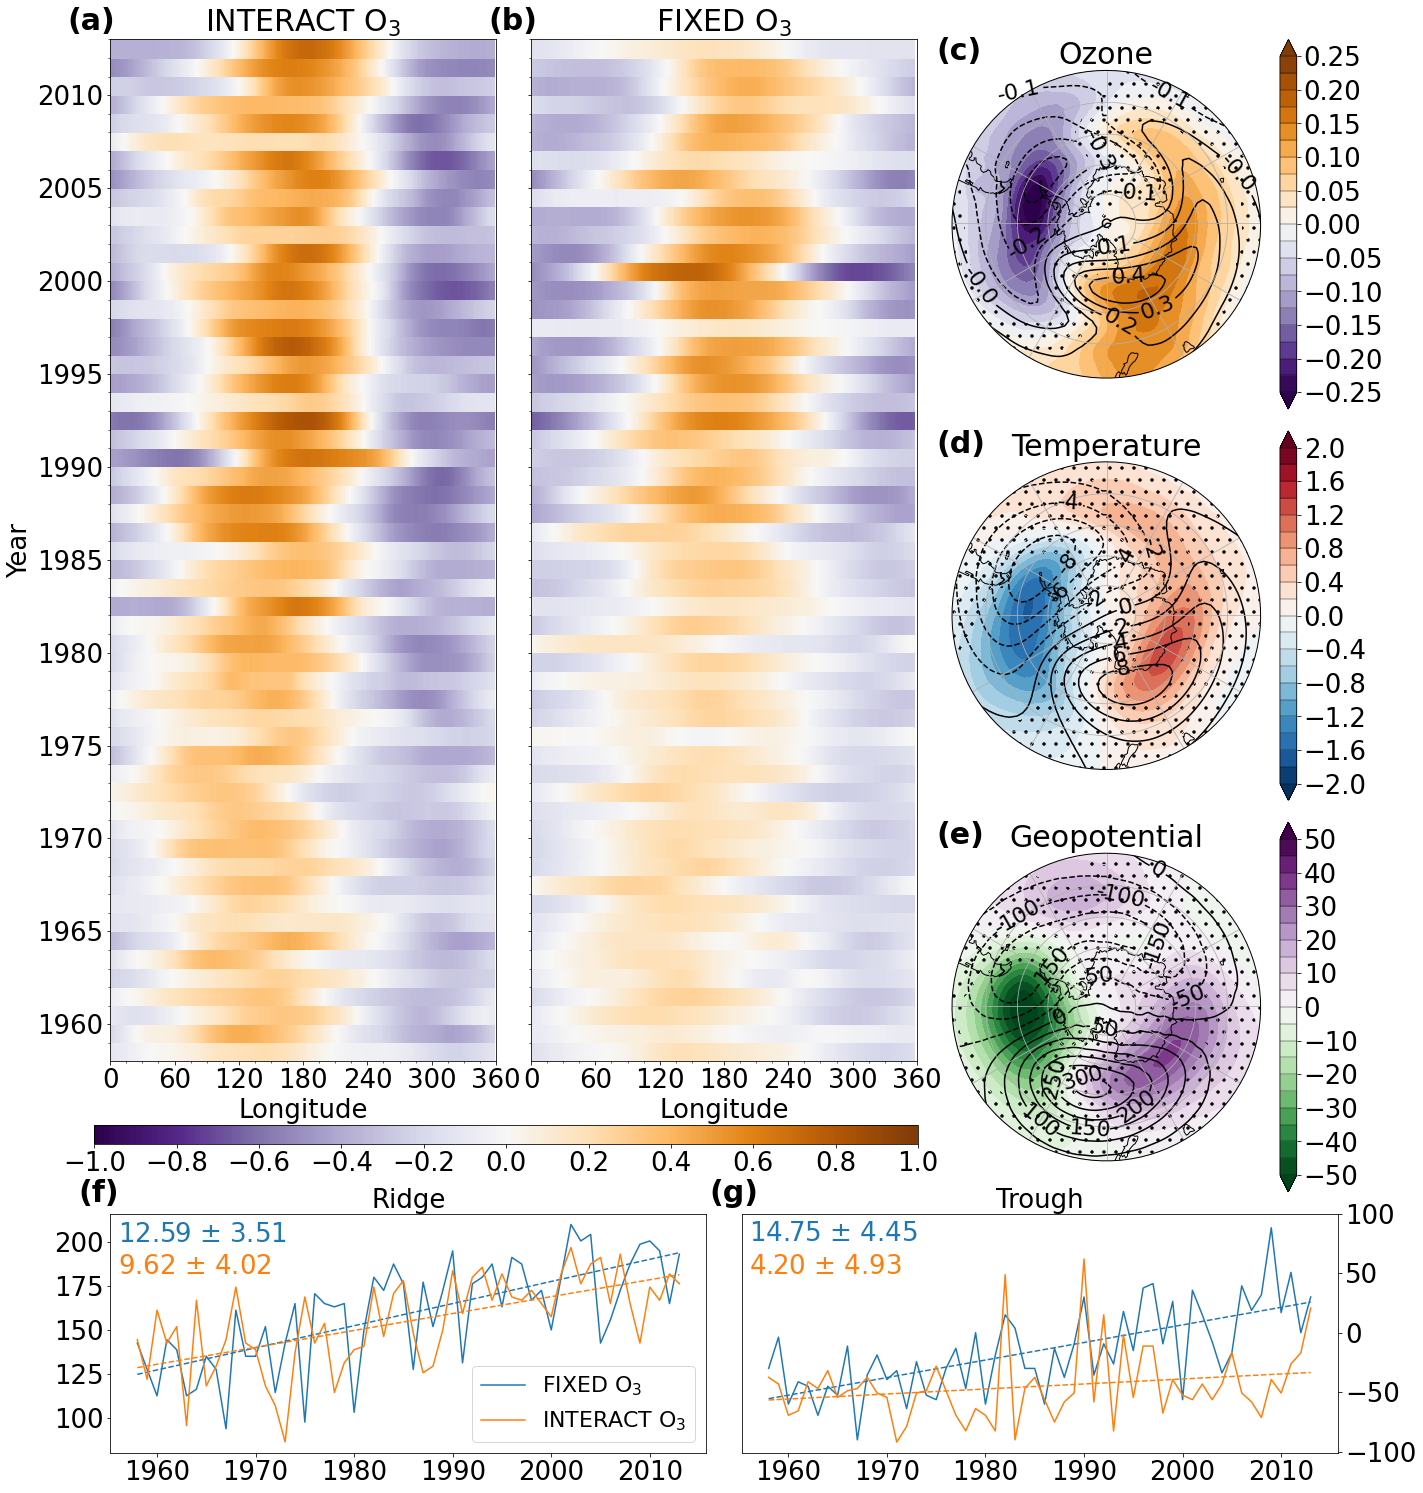

In [113]:
fig = plt.figure(figsize=(22,26))
gs = fig.add_gridspec(3, 3)

cont = np.arange(-1,1.1,0.1)

# Chem ON monthly timeseries
ax1 = plt.subplot2grid((11,6), (0,0), colspan=2, rowspan=8)
con = lon_time(moz_za_mon[9,:,:], 'INTERACT O$_3$', 'Longitude', 'Year')
plt.text(-40,2013.5, '(a)', fontsize=30, fontweight='bold')

# Chem OFF monthly timeseries
ax2 = plt.subplot2grid((11,6), (0,2), colspan=2, rowspan=8)
con = lon_time2(hist_za_mon[9,:,:], 'FIXED O$_3$', 'Longitude', '')
plt.text(-40,2013.5, '(b)', fontsize=30, fontweight='bold')

ticks = np.arange(-1,1.1,0.2)
cax = plt.axes([0.115, 0.29, 0.52, 0.01])
c = plt.colorbar(con, cax=cax, ticks=ticks, orientation='horizontal')
c.ax.tick_params(labelsize=26)

# O3 diff map
cont2 = np.arange(-0.5, 0.51, 0.1)
cont = np.arange(-0.25, 0.26, 0.025)
ax3 = plt.subplot2grid((11,6), (0,4), colspan=2, rowspan=3, projection=ccrs.SouthPolarStereo())
con = plot_map(diff_vmr[9,:,:], sign_vmr[9,:,:], moz_mean_vmr[9,:,:], cont, cont2, 'Ozone', ax3)

ticks = np.arange(-0.25, 0.26, 0.05)
#cax = plt.axes([0.1, 0.15, 0.8, 0.03])
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=26)
plt.text(-0.05,1.035, '(c)', fontsize=30, fontweight='bold', transform=plt.gca().transAxes)


# Temp diff map
cont2 = np.arange(-10, 10.1, 2)
cont = np.arange(-2, 2.1, 0.2)
ax4 = plt.subplot2grid((11,6), (3,4), colspan=2, rowspan=3, projection=ccrs.SouthPolarStereo())
con = plot_map2(diff_t[9,:,:].sel(lat=slice(-18,-90)), sign_t[9,:,:].sel(lat=slice(-18,-90)), moz_mean_t[9,:,:].sel(lat=slice(-18,-90)), cont, cont2, 'Temperature', ax4)
plt.text(-0.05,1.03, '(d)', fontsize=30, fontweight='bold', transform=plt.gca().transAxes)

ticks = np.arange(-2, 2.1, 0.4)
#cax = plt.axes([0.1, 0.15, 0.8, 0.03])
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=26)

# Geopoth diff map
cont2 = np.arange(-300, 301, 50)
cont = np.arange(-50, 50.1, 5)
ax5 = plt.subplot2grid((11,6), (6,4), colspan=2, rowspan=3, projection=ccrs.SouthPolarStereo())
con = plot_map3(diff_g[9,:,:], sign_g[9,:,:], moz_mean_g[9,:,:], cont, cont2, 'Geopotential', ax5)
plt.text(-0.05,1.03, '(e)', fontsize=30, fontweight='bold', transform=plt.gca().transAxes)

ticks = np.arange(-50, 50.1, 10)
#cax = plt.axes([0.1, 0.15, 0.8, 0.03])
c = plt.colorbar(con, ticks=ticks, drawedges=True)
c.ax.tick_params(labelsize=26)

# Timeseries of max
ax6 = plt.subplot2grid((11,6), (9,0), colspan=3, rowspan=3)
plt.plot(hist_max.year, hist_max, label='FIXED O$_3$')
plt.plot(hist_max.year, hist_max_tr, '--', color='tab:blue')
plt.plot(moz_max.year, moz_max, label = 'INTERACT O$_3$')
plt.plot(moz_max.year, moz_max_tr, '--', color='tab:orange')
ax6.tick_params(axis='both', labelsize=26)
plt.yticks([100,125,150,175,200])
plt.legend(fontsize=22)
plt.title('Ridge', fontsize=26)
plt.text(1952,223, '(f)', fontsize=30, fontweight='bold')
plt.text(1956, 200, '12.59 $\pm$ 3.51', fontsize=26, color='tab:blue')
plt.text(1956, 182, '9.62 $\pm$ 4.02', fontsize=26, color='tab:orange')

# Timeseries of min
ax7 = plt.subplot2grid((11,6), (9,3), colspan=3, rowspan=3)
plt.plot(hist_min.year, hist_min)
plt.plot(hist_min.year, hist_min_tr, '--', color='tab:blue')
plt.plot(moz_min.year, moz_min)
plt.plot(moz_min.year, moz_min_tr, '--', color='tab:orange')
ax7.yaxis.tick_right()
plt.yticks([-100,-50,0,50,100])
ax7.tick_params(axis='both', labelsize=26)
plt.title('Trough', fontsize=26)
plt.text(1952,110, '(g)', fontsize=30, fontweight='bold')
plt.text(1956, 77, '14.75 $\pm$ 4.45', fontsize=26, color='tab:blue')
plt.text(1956, 49, '4.20 $\pm$ 4.93', fontsize=26, color='tab:orange')